# The Task

The task is to build a classification model that estimates an applicant’s probability of admission to the university
based on scores of from two exams. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Plots
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
#Advanced optimization
from scipy import optimize as op


c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data


In [2]:
#read the data
data = pd.read_excel("C:\Users\Home Premium\Desktop\machine-learning-ex2\ex2\data_file_1.xlsx")
data.head(20)

,exam_1_score,exam_2_score,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


# Plot_Data Function

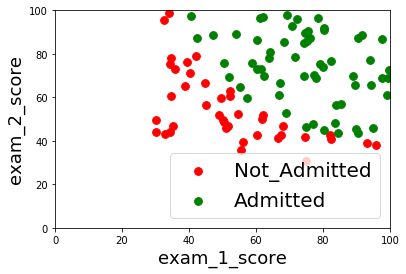

In [3]:
import matplotlib.pyplot as plt


#function that plot the data
def plot_data(data):
    colors = ["red", "green"] # list of colors depend on label
    Not_Admitted = plt.scatter(data[data['admission'] == 0].iloc[:,0],
                           data[data['admission'] == 0].iloc[:,1]
                           ,color = colors[0],s=60) # data of the students that not admitted
    
    Admitted = plt.scatter(data[data['admission'] == 1].iloc[:,0],
                        data[data['admission'] == 1].iloc[:,1],color = colors[1],s=60) # data of the students that admitted
    
    plt.axis([0, 100, 0, 100]) #  the range of values for x and y axis
    plt.legend((Not_Admitted, Admitted),('Not_Admitted' , 'Admitted'), scatterpoints=1, loc='lower right', ncol=1, fontsize=20)
    # describe the meaning of each data point
    plt.xlabel('exam_1_score', fontsize=18) # gives name for x axis
    plt.ylabel('exam_2_score', fontsize=18) # gives name for y axis
    plt.rcParams["figure.figsize"] = 10,10 # define the size of the graph
    plt.show()
    
plot_data(data)
                   

# Data Setup

In [4]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0,'ones',1) # add column called "ones"  in position 0 with all 1 values

# set x(training data) and y (target variable)
columns = data.shape[1]
x = data.iloc[:, 0:columns -1]
y = data.iloc[:, columns -1: columns]

# convert the numpy arrays and initalize he parameter array theta
x = np.array(x.values)
y = np.array(y.values)
theta = np.zeros(3)

# Split the Date to Train and Test

In [5]:
x_train , x_test, y_train , y_test = train_test_split(x , y, test_size = 0.25 , random_state = 1)

# Sigmoid Function

In [6]:
# sigmoid function - function that return probability between 0 and 1
# x is a linear line from the type: y = a + bx

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#For large positive values of x, the sigmoid should be close to 1, while for large 
#negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.


# Regularized Cost Function

In [7]:
def RegCostFunction(theta,x,y,lambda_ = 0.01):
    theta = np.matrix(theta)
    y = np.matrix(y)
    x = np.matrix(x)
    m = len(y) # number of training examples
    first_part = np.multiply(-y, np.log(sigmoid(x * theta.T))) # calculate the first part of the cost function
    second_part = np.multiply((1-y), np.log(1 - sigmoid(x * theta.T)))
    regularization = ((lambda_/(2*m)) * np.sum(np.square(theta)))
    return (np.sum(first_part - second_part) / (m)) + regularization # vectorized implementation

In [8]:
x.shape, theta.shape, y.shape, theta

((100, 3), (3,), (100, 1), array([ 0.,  0.,  0.]))

# Regularized Gradient Function

In [9]:
def RegGradienFunc(theta, x, y,lambda_ = 0.01):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    m = len(y) # number of training examples
    parameters = theta.shape[1] # take the number of parameters (theta i till n)
    gradient = np.zeros(parameters) # create a vector of 0 with length equal to the number of theta's(parameters)
    
    error = sigmoid(x * theta.T) - y # return a vector with length x
    for i in range(parameters):
        regularization = ((lambda_ * theta[0,i]) / (m)) # theta[0,i] returns float type while theta[:,i] returns matrix type 
        gradient[i] = (np.sum(np.multiply(error, x[:,i])) / (m)) + regularization  # returns single float value
    return gradient

# Optimal theta values

In [10]:
result = op.fmin_tnc(func = RegCostFunction , x0 = theta, fprime = RegGradienFunc, args = (x_train,y_train))
# func is the function that i want to minimize
# fprime is the Gradient of func
optimal_theta_values = result[0]

# Predict Function

In [11]:
def predict(theta ,x):
    theta = np.matrix(theta) # I transform theta into matrix in order to enable theta.T operation (np.array doesn't support this operation)
    probability = sigmoid(x * theta.T)
    predictions_res = [1 if x > 0.5 else 0 for x in probability]
    return predictions_res


In [12]:
predictions = predict(optimal_theta_values, x_test)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]  

# Test Accuacy

In [13]:
accuracy = (sum(correct) / float(len(correct))) * 100  
print 'accuracy = {0}%'.format(accuracy) 

accuracy = 88.0%
